# Exploração e análise de dados de crédito com SQL
Esse notebook faz parte do curso SQL para análise de dados da EBAC.

# Os dados:
Os dados representam informações de clientes de um banco e contam com as seguintes colunas:

- idade = idade do cliente
- sexo = sexo do cliente (F ou M)
- dependentes = número de dependentes do cliente
- escolaridade = nível de escolaridade do clientes
- salario_anual = faixa salarial do cliente
- tipo_cartao = tipo de cartao do cliente
- qtd_produtos = quantidade de produtos comprados nos últimos 12 meses
- iteracoes_12m = quantidade de iterações/transacoes nos ultimos 12 meses
- meses_inativo_12m = quantidade de meses que o cliente ficou inativo
- limite_credito = limite de credito do cliente
- valor_transacoes_12m = valor das transações dos ultimos 12 meses
- qtd_transacoes_12m = quantidade de transacoes dos ultimos 12 meses

A tabela foi criada no AWS Athena junto com o S3 Bucket com uma versão dos dados disponibilizados em: https://github.com/vitorbga/Credit_EDA_and_Analysis/blob/main/SQL_M8_support%20material_exercise_credit.csv



# Exploração de dados:
A primeira fase da análise é entender a nossa matéria prima. Começando pela exploração de dados:

**Qual a quantidade de informações que temos na base de dados?**

**Query:** SELECT count(*) FROM credito

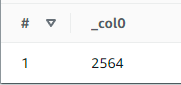

Reposta: 2564 linhas

**Como são os dados?**

**Query:** SELECT * FROM credito LIMIT 10; 

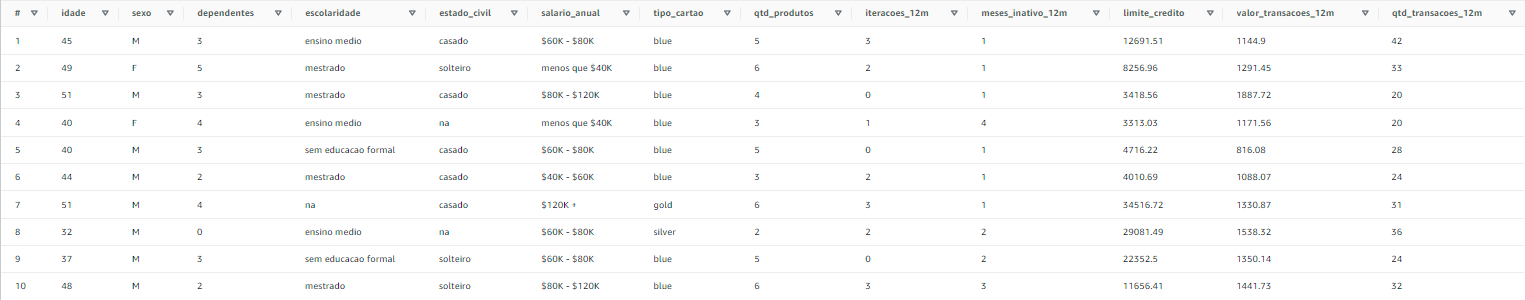

É possível reparar que existem informações nulas na tabela (valor na).

**Quais os tipos de cada dado?**

**Query:** DESCRIBE credito

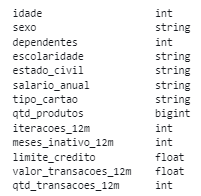

Descrição dos tipos de dados

Agora que identificamos os tipos de dados, vamos verificar as varíaveis que não são numéricas.

**Quais são os tipos de escolaridade disponíveis no dataset?**

**Query:** SELECT DISTINCT escolaridade FROM credito

Tipos de escolaridade

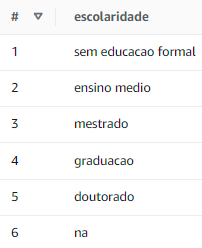

Os dados contam com vários níveis de escolaridade e é possível perceber que existem valores nulos (na) no dataset.

**Será que temos mais valores nulos?**

Quais são os tipos de estado_civil disponíveis no dataset?

**Query:** SELECT DISTINCT estado_civil FROM credito

Tipos de estado civil

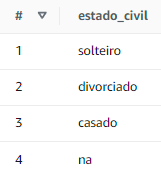

Novamente encontra-se valores nulos nos dados de estado civil.

**Quais são os tipos de salario_anual disponíveis no dataset?**

**Query:** SELECT DISTINCT salario_anual FROM credito

Tipos de salario anual

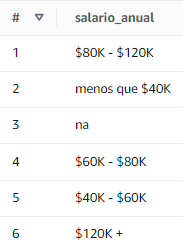

Os salários não estão com o valor exato que o cliente ganha, informando a faixa salarial de cada um. Também contem dados nulos.

**Quais são os tipos de cartão disponíveis no dataset?**

**Query:** SELECT DISTINCT tipo_cartao FROM credito

Tipos de cartão

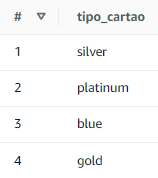

Aqui vemos que não há necessidade de tratar valores nulos.






# Análise de dados
Uma vez que exploramos o dados e buscamos entender quais são as informações que temos no nosso banco de dados, podemos analisar as informações para buscar entender o que está acontecendo no banco de dados. Vamos fazer perguntas:

**Nesse banco de dados, quantos clientes temos de cada faixa salarial?**

**Query:** select count(*), salario_anual from credito group by salario_anual

Quantidade para cada faixa salarial

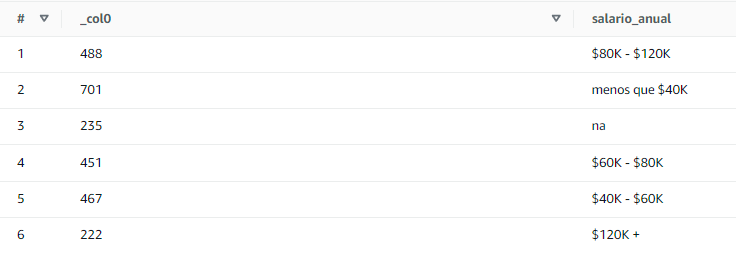

A maioria dos clientes possuem renda menor que 40K e existem 235 clientes que não informaram ou não consta a faixa salarial. Deste mode, é interessante focar no público de mais baixa renda.

**Nesse banco de dados, quantos clientes são homens e quantos são mulheres?**

**Query:** select count(*), sexo from credito group by sexo

Quantidade para cada sexo

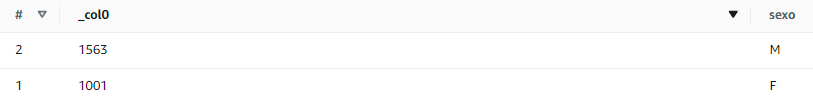

Quantidade para cada sexo - gráfico

A maioria dos clientes desse banco são homens.

**Queremos focar o nosso marketing de maneira adequada para nossos clientes, qual será a idade deles?**

**Query:** select avg(idade) as media_idade, min(idade) as min_idade, max(idade) as max_idade, sexo from credito group by sexoMédia de idades por sexo

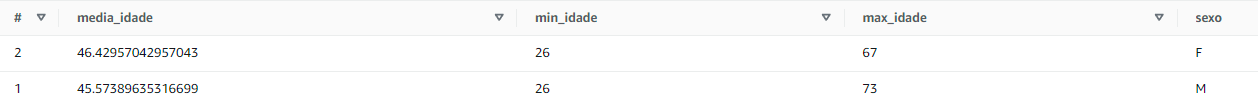

A menor idade dos dois sexos é a mesma e a média é muito similar, a única diferença é a idade máxima, sendo irrelevante pela diferença pequena. Assim essa análise não foi relevante. 

**Qual a maior e menor transação dos clientes?**

**Query:** select min(valor_transacoes_12m) as transacao_minima, max(valor_transacoes_12m) as transacao_minima from creditoValor transacoes

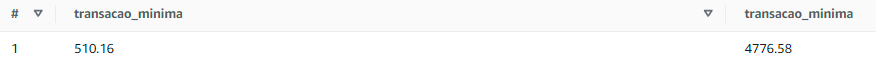

Nesse banco de dados temos soma de transações em 12 meses que variam de 510.16 a 5776.58

**Quais as características dos clientes que possuem os maiores creditos?**

**Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito desc limit 10

Valor limite

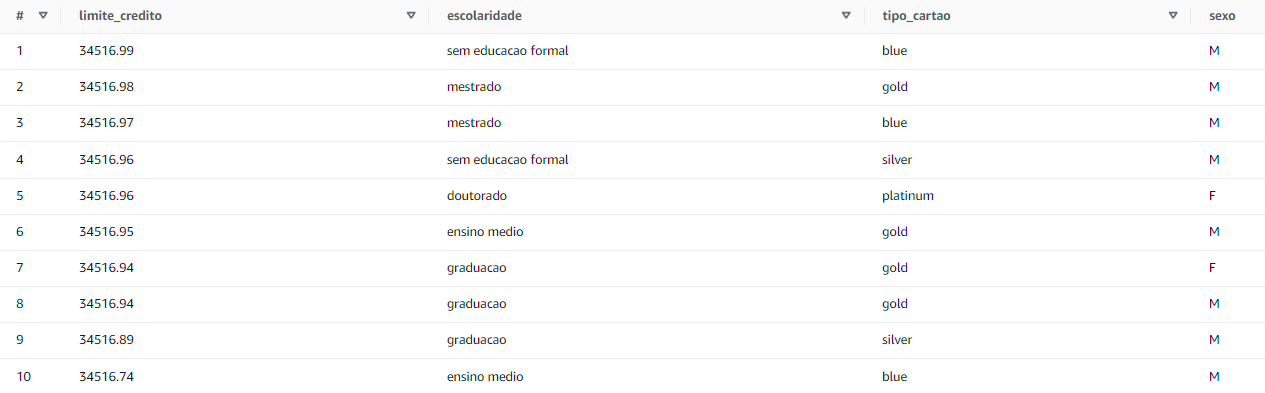

Não existe impacto da escolaridade no limite, já que o limite mais alto é oferecido para um homem sem educação formal. O cartão também não se relaciona com a escolaridade nem com o limite, dentre os maiores limites, encontramos clientes com cartão: gold, silver, platinum e blue

**Quais as características dos clientes que possuem os menores creditos?**

**Query:** select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito where escolaridade != 'na' and tipo_cartao != 'na' group by escolaridade, tipo_cartao, sexo order by limite_credito asc

Valor limite

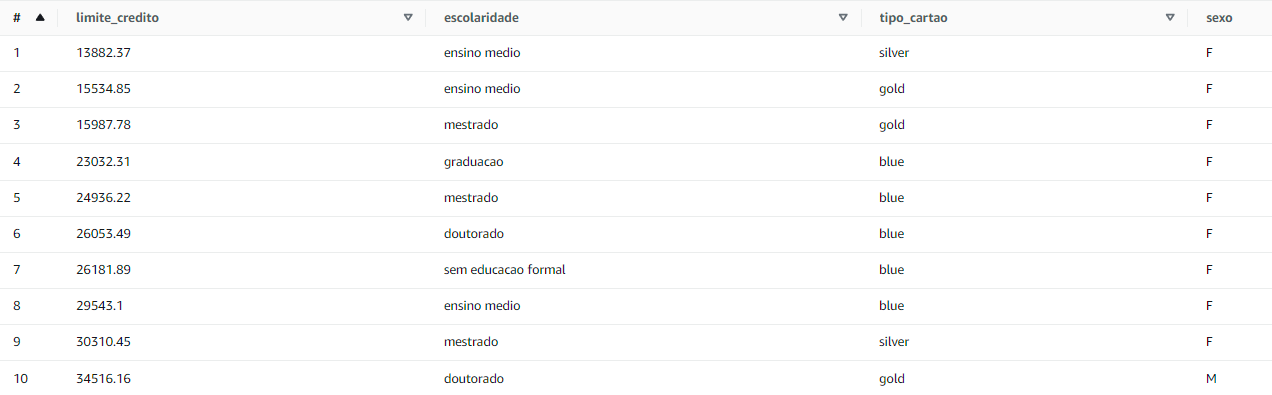

Dessa vez percebe-se que não há clientes com cartão platinum entre os menores limites. Percebe-se também que a maioria dos menores limites são mulheres enquanto nos maiores são homens.

**Será que as mulheres gastam mais?**

**Query:** select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo from credito group by sexo

Valor transacoes/sexo

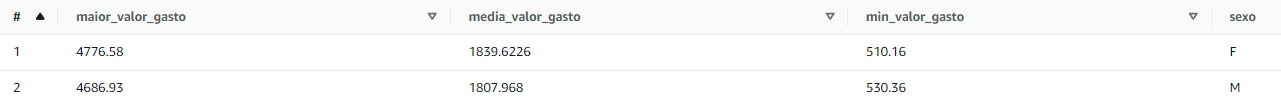

Apesar da diferença nos limites, os gastos de homens e mulheres são similares.

Por fim,

**O salário impacta no limite?**

**Query:** select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual from credito where salario_anual != 'na' group by sexo, salario_anual order by avg(valor_transacoes_12m) desc

Valor salario_anualLimite

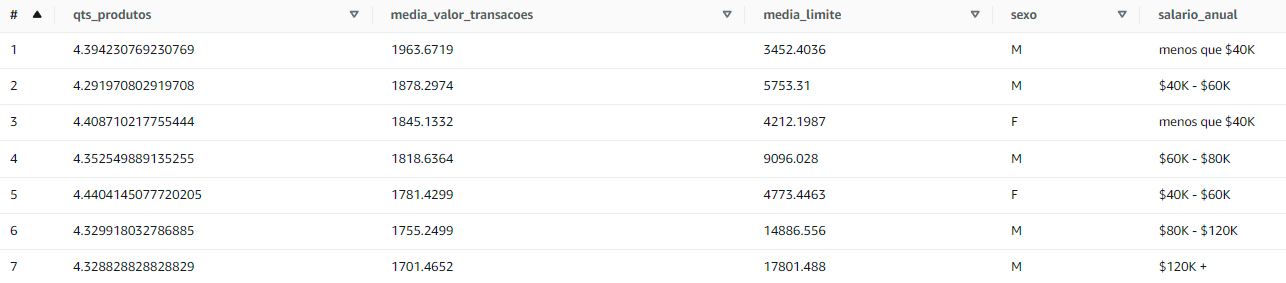

Sim. É notável que as pessoas que possuem menor faixa salarial também apresentam menor limite de credito.


# Conclusão
Essas foram as análises extraídas do dataset de crédito. Tendo os insights:

- A maior parte dos clientes possui renda até 40K
- A maior parte dos clientes é masculino!
- A escolaridade não parece influenciar no limite nem no tipo do cartão
- Os clientes com maiores limites são em sua maioria homens
- Os clientes com menores limites são em sua maioria mulheres
- Dentre os menores limites não há presença de cartão platinum
- A faixa salarial impacta diretamente no limite de crédito
- Não existem clientes com salário anual acima de 60K do sexo feminino